# Notebook to calculate EI as a function of timestep, where timestep represents the probability of ending in state j after t steps given that you start in state i

Temperature =  1
Temperature =  100
Temperature =  10000


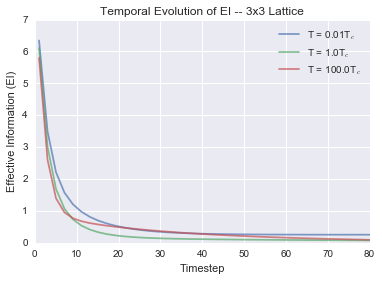

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

temp_array = [1,100,10000]
time_array = np.linspace(1,80,40)

for T in temp_array:
    
    print "Temperature = ", T
    
    TPM_file = '../TPM_DATA/ANALYTIC_TPM_3x3_'+str(T)+'.txt' # 0.01T_c data
    ORIGINAL_TPM =  pd.read_table(TPM_file,sep='\t',skiprows=[0,1,2,3],header=None)
    N_states = np.shape(ORIGINAL_TPM)[0]
    
    EI_array = []
    for time in time_array:

        TPM = np.linalg.matrix_power(ORIGINAL_TPM,int(time)) # raise TPM to the power of time

        # Calculate ED
        ED = np.zeros(N_states)
        for i in range(N_states):
            for j in range(N_states):
                ED[i] = ED[i] + TPM[j][i]/np.double(N_states)  # ED for uniform dist

        # Calculate EI
        EI = 0
        for i in range(N_states):
            for j in range(N_states):
                if(TPM[i][j] > 0.):
                    EI = EI + TPM[i][j]*np.log2(TPM[i][j]/ED[j])/N_states

#         print 'Timestep = ',time
#         print '\tEI = ',EI
        EI_array.append(EI)
        
    plt.plot(time_array,EI_array,alpha=0.7,label=r'T = '+str(T/100.)+'T$_c$')
    
plt.title('Temporal Evolution of EI -- 3x3 Lattice')
plt.xlabel('Timestep')
plt.ylabel('Effective Information (EI)')
plt.legend()
plt.savefig('/Users/jakehanson/Desktop/temporal_evolution.pdf')
plt.show()
    
# print TPM

## Effective information drops quickly with time in the Ising Model. This is due to drastic loss in predictive power over where you came from and where you are headed at each timestep

## TROUBLESHOOTING NOTES
- In theory, I would expect the TPM to converge to the lowest energy state as time goes to infinity. This would mean that EI should go to zero, unless, of course, I am misunderstanding something
#### Misunderstanding was that there are two low energy states and each is equally likely on average. However, the distribution of futures splits probabilities between these two end states according to energetic distance.

- So far, it looks like transposing the TPM was not the correct thing to do for these calculations. It messed up the inbound and outbound transition probabilities
#### Definitely true. The indexing also switched back for np.matrix() so that it is [row][col] 

- Also, there seems to be a weird problem using np.linalg.matrix_power(TPM,1) which gives different a different value for EI than just using the TPM despite having identical elements.. not sure what is wrong here
#### This was due to [col][row] becoming [row][col] for matrix. This messed up ED and EI calculations
